In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [19]:
df = pd.read_csv('learning_dim.csv', names=['learning_dim', 'train_acc', 'test_acc'], header=None)
df[["train_acc", "test_acc"]] = df[["train_acc", "test_acc"]] * 100
df

,learning_dim,train_acc,test_acc
0,512,68.275848,69.461138
1,1024,80.367718,77.473958
2,2048,96.462868,81.650641
3,4096,99.443822,84.064503
4,8192,99.707907,82.101362


In [20]:
params = {
   'font.size': 24,
   'axes.linewidth': 1.25,
   'axes.labelsize': 24,
   'legend.fontsize': 24,
   'xtick.labelsize': 24,
   'ytick.labelsize': 24
}
plt.rcParams.update(params)

In [21]:
title = 'Effect of $d^{lr}$ on the accuracy'
x_label = '$d^{lr}$'
y_label = 'Accuracy (%)'
legend_labels = ['Train accuracy', 'Test accuracy']

In [22]:
from palettable.colorbrewer.qualitative import Set2_3
colors = Set2_3.mpl_colors

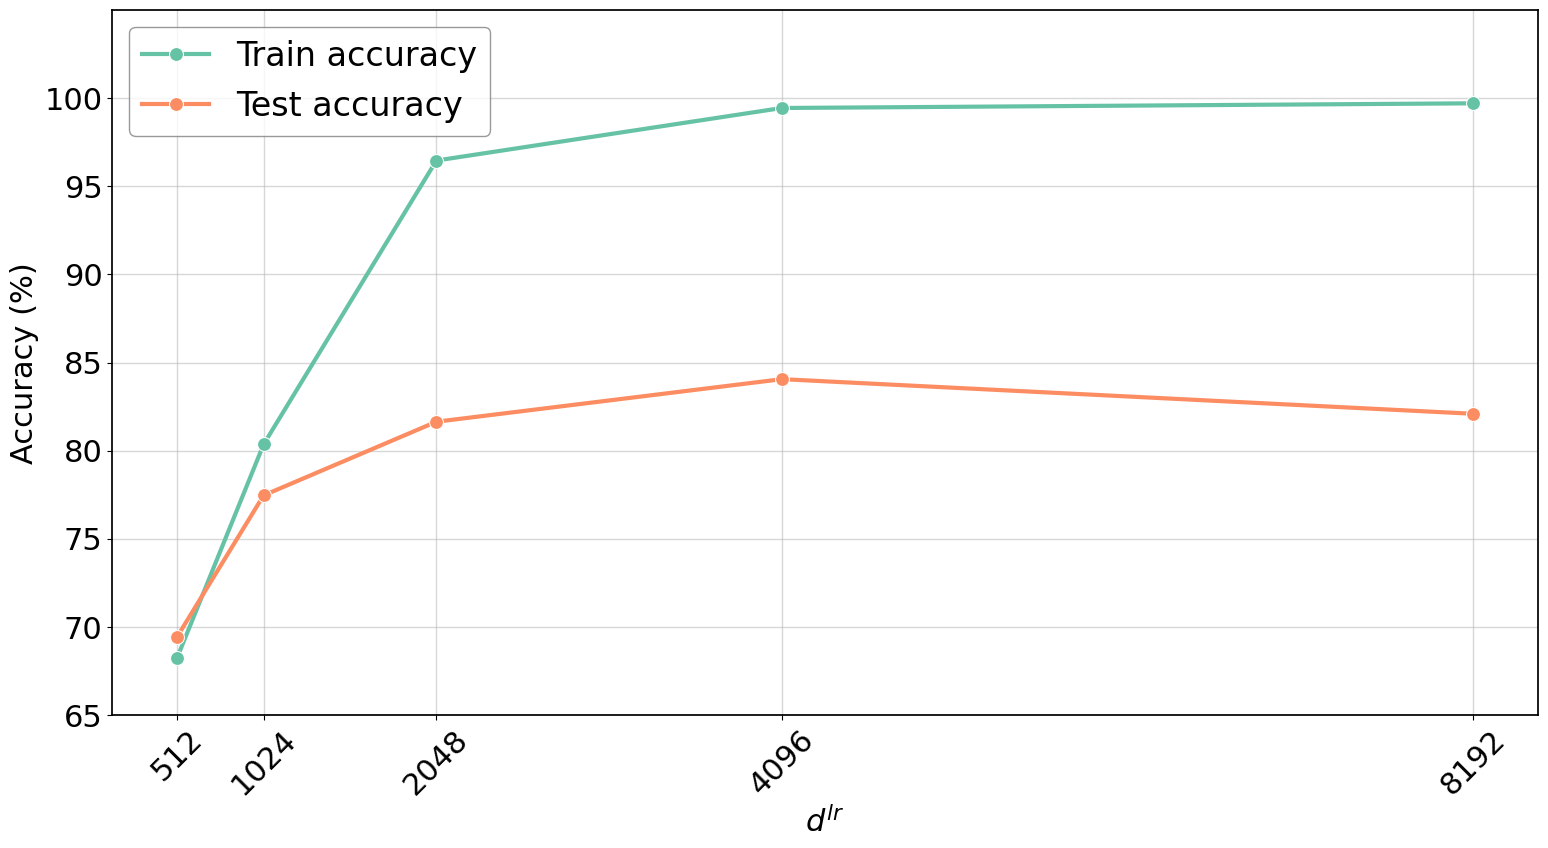

In [23]:
_, ax = plt.subplots(figsize=(16, 9))
kwargs = dict(ax=ax, marker='o', linestyle='-', errorbar=None, linewidth=3, markersize=10)
sns.lineplot(data=df, x='learning_dim', y='train_acc', **kwargs, color=colors[0])
sns.lineplot(data=df, x='learning_dim', y='test_acc', **kwargs, color=colors[1])
 
ax.set_xticks(df['learning_dim'].unique())
ax.xaxis.set_tick_params(labelsize=22, rotation=45)
ax.set_xlabel(x_label, fontsize=22)

ax.set_yticks(range(0, 101, 5), labels=range(0, 101, 5), fontsize=22)
ax.set_ylim(65, 105)
ax.set_ylabel(y_label, fontsize=22)

# ax.set_title(title, fontsize=25)
legend = plt.legend(legend_labels)
frame = legend.get_frame()
frame.set_edgecolor('0.5')
plt.grid(linewidth=1, alpha=0.5, axis='both')
plt.tight_layout()
plt.savefig('dim_lr_effect.pdf')